# Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [250]:
#cocacola
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [173]:
co=pd.read_excel('CocaCola_Sales_Rawdata.xlsx',index_col=0,header=0)
co

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


<AxesSubplot:xlabel='Quarter'>

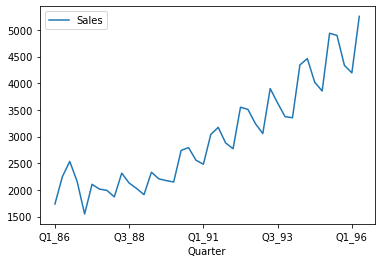

In [174]:
co.plot()

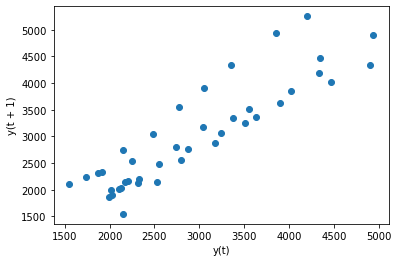

In [175]:
from pandas.plotting import lag_plot
lag_plot(co)
plt.show()

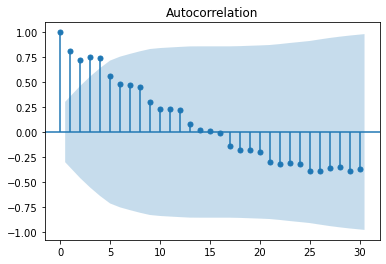

In [176]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(co,lags=30)
plt.show()

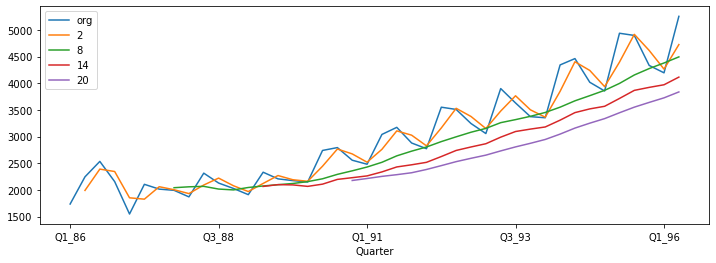

In [177]:
plt.figure(figsize = (12,4))
co['Sales'].plot(label = 'org')
for i in range(2, 24, 6):
    co['Sales'].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 'best')

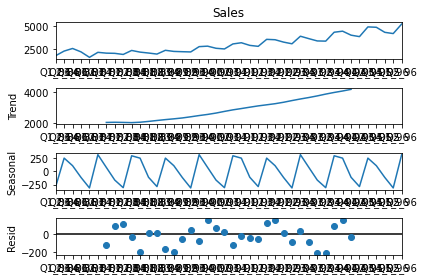

In [178]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(co['Sales'], period = 12)
decompose_ts_add.plot()
plt.show()

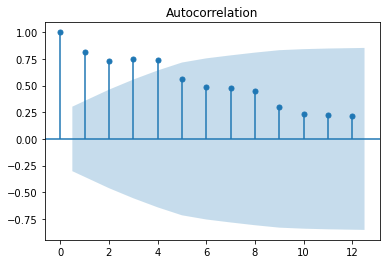

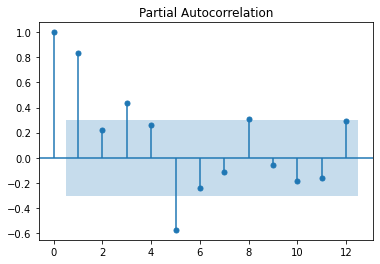

In [179]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(co.Sales, lags = 12)
tsa_plots.plot_pacf(co.Sales, lags = 12)
plt.show()

In [180]:
def MAPE(pred, org):
    temp = np.abs((pred-org)/ org)*100
    return np.mean(temp)

In [181]:
def RMSE(pred):
    rmse = np.sqrt(np.mean((np.array(test['Sales']) - np.array(pred))**2))
    return rmse

In [182]:
#exponential smothing
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
cokes =pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
train = cokes.head(30)
test = cokes.tail(12)
start = test.index[0]
end = test.index[-1]
ses_model = SimpleExpSmoothing(train.Sales).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = start, end = end)
print('The MAPE value is:', MAPE(pred_ses, test.Sales))
print('The RMSE value is:', RMSE(pred_ses))

The MAPE value is: 22.046763674416013
The RMSE value is: 1153.703170572247


In [183]:
#hott model
from statsmodels.tsa.holtwinters import Holt
hw_model=Holt(train.Sales).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw=hw_model.predict(start=start,end=end)
print('THE MAPE VALUE IS:',MAPE(pred_hw,test.Sales))
print('THE RMSE VALUE IS:',RMSE(pred_hw))


THE MAPE VALUE IS: 11.21384176728494
THE RMSE VALUE IS: 559.5201064083561


In [184]:
#holt winters exponentialsmoothing with additive seasonality and additive trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing
ex_model_add_add=ExponentialSmoothing(train.Sales,seasonal='add',trend='add',seasonal_periods=12).fit()
pred_ex_aa=ex_model_add_add.predict(start=start,end=end)
print('THE MAPE VALUE IS:',MAPE(pred_ex_aa,test.Sales))
print('THE RMSE VALUE IS:',RMSE(pred_ex_aa))


THE MAPE VALUE IS: 7.727153195645009
THE RMSE VALUE IS: 417.14094182719725


In [204]:
#holt winters exponentialsmoothing with multiplitative seasonality and additive trend
ex_model_add_multi=ExponentialSmoothing(train.Sales,seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_ex_am=ex_model_add_multi.predict(start=start,end=end)
print('THE MAPE VALUE IS:',MAPE(pred_ex_am,test.Sales))
print('THE RMSE VALUE IS:',RMSE(pred_ex_am))

THE MAPE VALUE IS: 4.322513783549544
THE RMSE VALUE IS: 212.6662052084969


In [186]:
final_model=ExponentialSmoothing(co.Sales,seasonal='add',trend='add',seasonal_periods=12).fit()
final_model.forecast(12)

42    4952.179130
43    4770.339808
44    4799.559682
45    5674.370110
46    5710.387064
47    5287.030513
48    5162.798355
49    6119.518265
50    6004.894163
51    5538.624650
52    5458.975047
53    6359.165001
dtype: float64

In [187]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(co['Sales'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, 
                          seasonal = True, d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=407.084, Time=0.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=402.446, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=406.443, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=406.440, Time=0.12 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=404.444, Time=0.08 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=404.444, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=406.429, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=404.445, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=404.443, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=405.084, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=403.610, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.123 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   42
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -200.223
Date:                            Wed, 14 Apr 2021   AIC                            402.446
Time:                                    09:18:45   BIC                            403.813
Sample:                                         0   HQIC                           402.874
                                             - 42                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.813e+04   1.67e+04      3.472      0.001    2.53e+04    9.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.88   Prob(JB):                         0.76
Heteroskedasticity (H):               0.54   Skew:                             0.22
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [188]:
#!pip install pmdarima

In [198]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  
import warnings
warnings.filterwarnings("ignore")
model = SARIMAX(train['Sales'], order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   30
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -117.493
Date:                            Wed, 14 Apr 2021   AIC                            244.986
Time:                                    09:22:06   BIC                            249.152
Sample:                                         0   HQIC                           245.400
                                             - 30                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0876      0.270      0.325      0.745      -0.441       0.617
ar.S.L12       0.5481      7.508      0.073      0.942     -14.168      15.264
ar.S.L24       0.4495      7.305      0.062      0.951     -13.868      14.767
ma.S.L12      -1.0000      5.249     -0.191      0.849     -11.287       9.287
sigma2      5.177e+04      0.000   4.57e+08      0.000    5.18e+04    5.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.72   Prob(JB):                         0.84
Heteroskedasticity (H):               0.41   Skew:                             0.04
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+26. Standard errors may be unstable.
"""

<AxesSubplot:>

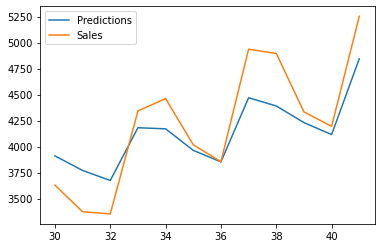

In [199]:
predictions = result.predict(start = test.index[0], end = test.index[-1], typ = 'levels').rename("Predictions")
predictions.plot(legend = True)
test['Sales'].plot(legend = True)

In [200]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
rmse(test["Sales"], predictions)
mean_squared_error(test["Sales"], predictions)

92536.89115709912

42    4975.970439
43    4742.765396
44    4715.066635
45    5686.803270
46    5771.668075
47    5350.210374
48    5177.730723
49    6208.661325
50    6118.317245
51    5618.091190
52    5553.689140
53    6585.089453
Name: Forecast, dtype: float64

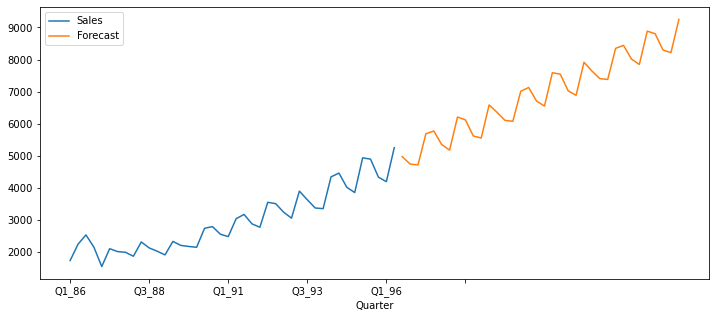

In [201]:
model = model = SARIMAX(co['Sales'], order = (0, 1, 1), seasonal_order = (2, 1, 1, 12))
result = model.fit()
forecast = result.predict(start = len(co), end = (len(co)-1) + 3 * 12, typ = 'levels').rename('Forecast')
co['Sales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
forecast.head(12)

In [202]:
MAPE(predictions, test.Sales)

6.045056323717752

In [203]:
RMSE(predictions)

304.19876915776484

In [207]:
data = {'MODEL': pd.Series(['rmse_Simple_Exponential', 'rmse_Holts', 'rmse_holts_winter_add_add', 'rmse_holts_winter_mul_add', 'rmse_ARIMA']), 
        "rmse_values":pd.Series([RMSE(pred_ses), RMSE(pred_hw), RMSE(pred_ex_aa), RMSE(pred_ex_am), RMSE(predictions)])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['rmse_values'])

,MODEL,rmse_values
3,rmse_holts_winter_mul_add,212.666205
4,rmse_ARIMA,304.198769
2,rmse_holts_winter_add_add,417.140942
1,rmse_Holts,559.520106
0,rmse_Simple_Exponential,1153.703171


In [209]:
data = {'MODEL': pd.Series(['MAPE_Simple_Exponential', 'MAPE_Holts', 'MAPE_holts_winter_add_add', 'MAPE_holts_winter_mul_add', 'MAPE_ARIMA']), 
        "MAPE_values":pd.Series([MAPE(pred_ses,test.Sales), MAPE(pred_hw,test.Sales), MAPE(pred_ex_aa,test.Sales), MAPE(pred_ex_am,test.Sales), MAPE(predictions, test.Sales)])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['MAPE_values'])

,MODEL,MAPE_values
3,MAPE_holts_winter_mul_add,4.322514
4,MAPE_ARIMA,6.045056
2,MAPE_holts_winter_add_add,7.727153
1,MAPE_Holts,11.213842
0,MAPE_Simple_Exponential,22.046764


#From the above table we can conclude that the Holt's Winter Exponential Smoothing with additive seasonality and trend model is best suitable for the Coca-Cola Data
1
​

# AIR line data

In [293]:
air=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0) 
air.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<AxesSubplot:xlabel='Month'>

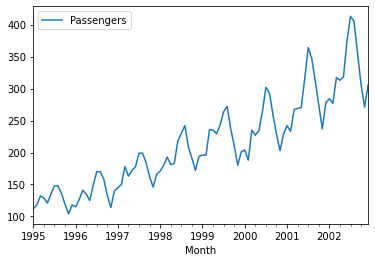

In [254]:
air.plot()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

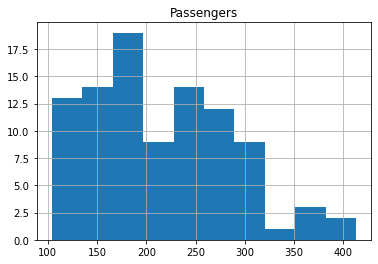

In [255]:
air.hist()

<AxesSubplot:ylabel='Density'>

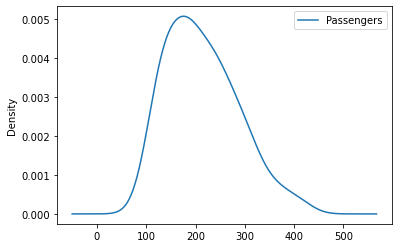

In [256]:
air.plot(kind='kde')

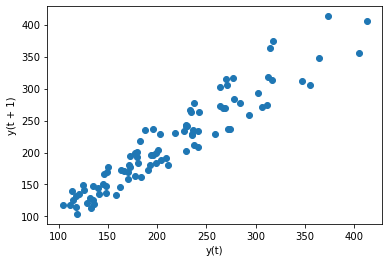

In [257]:
from pandas.plotting import lag_plot
lag_plot(air)
pyplot.show()

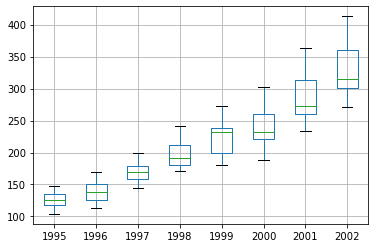

In [262]:
from pandas import Grouper
airlines = pd.read_excel("Airlines+Data.xlsx",header = 0, index_col = 0, parse_dates = True, squeeze = True)
groups = airlines.groupby(Grouper(freq = 'A'))
groups = airlines.groupby(Grouper(freq = 'A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

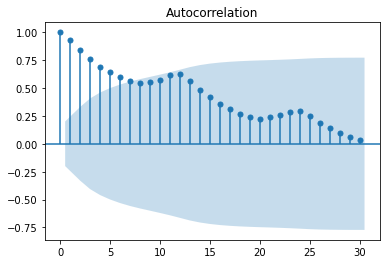

In [263]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(air, lags = 30)
pyplot.show()

In [264]:
Train=air.head(84)
Test=air.tail(12)

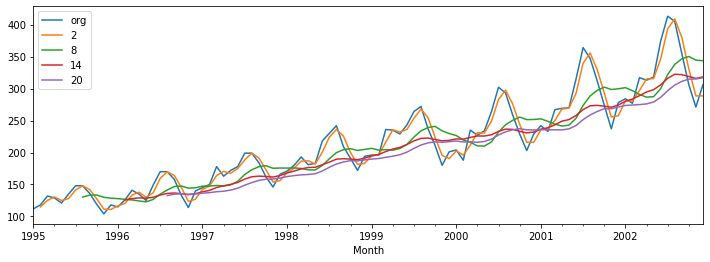

In [267]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
air['Passengers'].plot(label='org')
for i in range(2,24,6):
    air['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc = 'best')

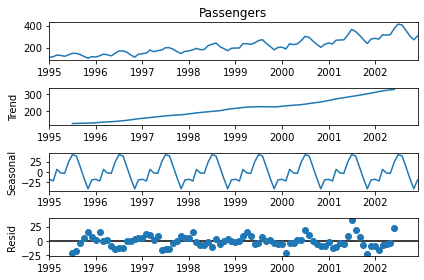

In [268]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(air['Passengers'], period = 12)
decompose_ts_add.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

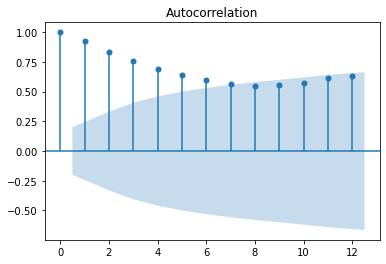

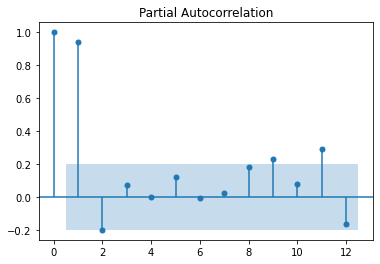

In [269]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air['Passengers'], lags = 12)
tsa_plots.plot_pacf(air['Passengers'], lags = 12)
plt.show

In [270]:
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

In [271]:
def rmse(pred):
    rmse = np.sqrt(np.mean((np.array(Test['Passengers'])- np.array(pred))**2))
    return rmse

In [272]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [273]:
# Simple Exponential Method
import warnings
ses_model = SimpleExpSmoothing(Train['Passengers']).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
print('MAPE Value for the Simple Exponential Model is:',MAPE(pred_ses, Test['Passengers']))
print('rmse value for the model is:',rmse(pred_ses))

MAPE Value for the Simple Exponential Model is: 13.411274740513823
rmse value for the model is: 64.84476396990497


In [274]:
# Holt's Method
hw_model = Holt(Train['Passengers']).fit(smoothing_level = 0.8, smoothing_slope = 0.2)
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
print('The MAPE value for the Holt model is:', MAPE(pred_hw, Test['Passengers']))
print('The rmse value for the model is:', rmse(pred_hw))

The MAPE value for the Holt model is: 23.53071965210049
The rmse value for the model is: 95.7667445267524


In [275]:
# Holt's Winter exponential smoothing with addaptive seasonality and additive trend
hw_model_add_add = ExponentialSmoothing(Train['Passengers'], seasonal = 'add', trend = 'add', seasonal_periods =12).fit()
pred_hw_add_add = hw_model_add_add.predict(start = Test.index[0], end= Test.index[-1])
print('The MAPE value for the model is:', MAPE(pred_hw_add_add, Test['Passengers']))
print('The rmse value for the model is:', rmse(pred_hw_add_add))

The MAPE value for the model is: 5.495938663841666
The rmse value for the model is: 28.79391476828249


In [276]:
# Holt's WInter Exponential Smoothing with Multiplicative Seasonality and Additive Trend
hw_model_mul_add = ExponentialSmoothing(Train['Passengers'], seasonal = 'mul', trend = 'add', seasonal_periods = 12).fit()
pred_hw_mul_add = hw_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
print('The MAPE value for the model is :', MAPE(pred_hw_mul_add, Test['Passengers']))
print('The rmse value for the model is :', rmse(pred_hw_mul_add))

The MAPE value for the model is : 2.821237608921072
The rmse value for the model is : 12.921284284293778


In [277]:
hwe_model_add_add = ExponentialSmoothing(air['Passengers'], seasonal = 'add', trend = 'add', seasonal_periods = 12).fit()

In [278]:
hwe_model_add_add.forecast(10)

2003-01-01    319.235284
2003-02-01    311.528413
2003-03-01    350.278738
2003-04-01    346.985064
2003-05-01    351.845130
2003-06-01    403.925766
2003-07-01    440.566807
2003-08-01    427.446405
2003-09-01    376.628081
2003-10-01    329.767444
Freq: MS, dtype: float64

In [279]:
#forcasting by arima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(air['Passengers'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, 
                          seasonal = True, d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=618.049, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.40 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.26 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.00 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.08 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.13 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.10 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.40 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Wed, 14 Apr 2021   AIC                            615.965
Time:                                    10:00:27   BIC                            623.222
Sample:                                         0   HQIC                           618.881
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [280]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  
model = SARIMAX(Train['Passengers'], order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -261.892
Date:                            Wed, 14 Apr 2021   AIC                            533.783
Time:                                    10:00:45   BIC                            545.097
Sample:                                01-01-1995   HQIC                           538.282
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2148      0.112     -1.915      0.055      -0.435       0.005
ar.S.L12      -1.2043      0.875     -1.376      0.169      -2.919       0.511
ar.S.L24      -0.3643      0.246     -1.481      0.139      -0.847       0.118
ma.S.L12       0.9989     91.822      0.011      0.991    -178.969     180.967
sigma2        83.4200   7590.995      0.011      0.991   -1.48e+04     1.5e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.45
Prob(Q):                              1.00   Prob(JB):                         0.29
Heteroskedasticity (H):               2.52   Skew:                             0.44
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

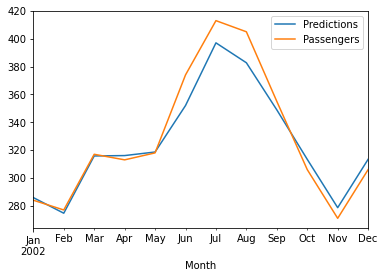

In [281]:
predictions = result.predict(start = Test.index[0], end = Test.index[-1], typ = 'levels').rename("Predictions")
predictions.plot(legend = True)
Test['Passengers'].plot(legend = True)

<AxesSubplot:xlabel='Month'>

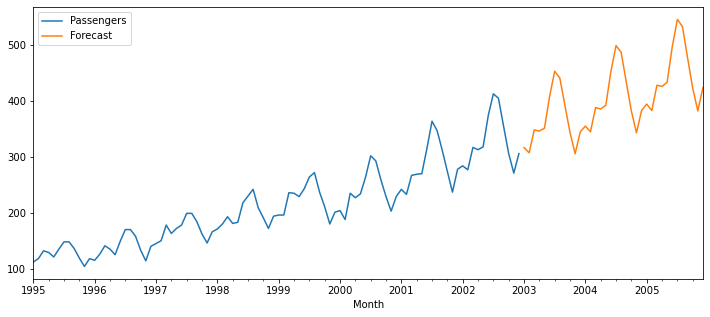

In [286]:
model = model = SARIMAX(air['Passengers'], order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
result = model.fit()
forecast = result.predict(start = len(air), end = (len(air)-1) + 3 * 12, typ = 'levels').rename('Forecast')
air['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [287]:
forecast.head(10)

2003-01-01    316.741540
2003-02-01    307.420493
2003-03-01    348.266715
2003-04-01    346.331717
2003-05-01    351.474758
2003-06-01    408.167506
2003-07-01    453.406221
2003-08-01    441.348636
2003-09-01    392.238442
2003-10-01    343.635665
Freq: MS, Name: Forecast, dtype: float64

In [289]:
MAPE(predictions,Test['Passengers'])

2.3061832093394163

In [290]:
data = {'MODEL': pd.Series(['MAPE_Simple_Exponential', 'MAPE_Holts', 'MAPE_holts_winter_add_add', 'MAPE_holts_winter_mul_add', 'MAPE_ARIMA']), 
        "MAPE_values":pd.Series([MAPE(pred_ses,Test.Passengers), MAPE(pred_hw,Test.Passengers), MAPE(pred_hw_add_add,Test.Passengers), MAPE(pred_hw_mul_add,Test.Passengers), MAPE(predictions, Test.Passengers)])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['MAPE_values'])

,MODEL,MAPE_values
4,MAPE_ARIMA,2.306183
3,MAPE_holts_winter_mul_add,2.821238
2,MAPE_holts_winter_add_add,5.495939
0,MAPE_Simple_Exponential,13.411275
1,MAPE_Holts,23.530720
